In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq
from math import factorial
import random
%matplotlib inline

# Week 2 Notes
### Fitting Functions, Numerical Derivatives, Integrals, Numerical Error

## Fiting a function

Last week, we wrote a fit function outselves. It should have looked something like this:

To solve this matrix equation we must solve the expression:

$$ 
\begin{bmatrix}
    b \\
    m
\end{bmatrix}
 = (X^T X)^{-1} X^T 
 \begin{bmatrix}
    y_1 \\
    y_2
\end{bmatrix}
$$

Where X is the matrix of measured values and ones shown above and $y_1$, $y_2$ are the measured y values.

In [15]:
def find_params(X, y):
    """
    Solve the matrix equation listed above and return a list: [b, m]
    """
    xt = X.T
    xtXinv_xt = np.linalg.inv(xt @ X) @ xt
    return xtXinv_xt.dot(y)
    
    
# Once you have written the function, text it with this matrix and vector. 
# Store the value b and m as a variable for the next step.
x = [3.2, 6.7, 2.3, 5.2, 4.7]
x = np.array([[1, i] for i in x])
y = np.array([8.4, 20.3, 7.1, 16.3, 13.8])

b, m = find_params(X, y)
b, m

(-0.80921806538588004, 3.1649814627569866)

In [17]:
def f(x, b, m):
    return m*x + b

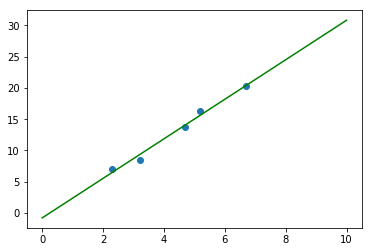

In [20]:
x_rng = np.linspace(0, 10, 100)

# Starter code to make the plot
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x_rng, f(x_rng, b, m), 'g')

This is called a linear least squares fit. But it seems tedious to code it each time so from now on, we will use a package from scipy to do it instead.

Let's fit the same fumction using scipy:

[ 3.16498143 -0.80921788]


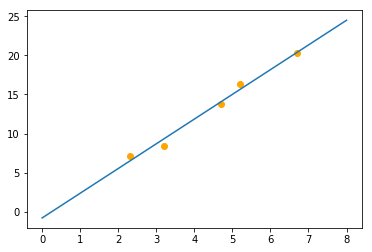

In [59]:
y_dat = np.array([8.4, 20.3, 7.1, 16.3, 13.8])
x_dat = np.array([3.2, 6.7, 2.3, 5.2, 4.7])

def fit_func(p, x):
    # Now p is an array of parameters
    return p[0]*x + p[1]

def err_func(p, x, y):
    return y - fit_func(p, x)

p0 = [1., 1.]
p1, success = leastsq(err_func, p0[:], args=(x_dat, y_dat))
print(p1)

x = np.linspace(0, 8, 100)
fig, ax = plt.subplots()
ax.plot(x, fit_func(p1, x))
ax.scatter(x_dat, y_dat, color='orange')

We can also modify it to try fitting other types of functions easily. For example, we could try fitting a quadratic function.

[ 0.06208314  2.61090991  0.27953665]


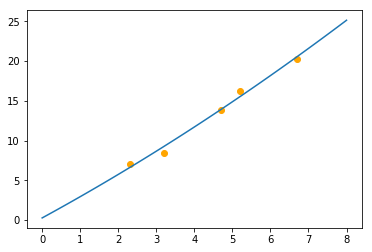

In [60]:
y_dat = np.array([8.4, 20.3, 7.1, 16.3, 13.8])
x_dat = np.array([3.2, 6.7, 2.3, 5.2, 4.7])

def fit_func(p, x):
    # Now p is an array of parameters
    return p[0]*x**2 + p[1]*x + p[2]

def err_func(p, x, y):
    return y - fit_func(p, x)

p0 = [1., 1., 1.]
p1, success = leastsq(err_func, p0[:], args=(x_dat, y_dat))
print(p1)

x = np.linspace(0, 8, 100)
fig, ax = plt.subplots()
ax.plot(x, fit_func(p1, x))
ax.scatter(x_dat, y_dat, color='orange')

# Derivatives

We saw the first example of a simple numerical derivative in the problems next week. For this simplest form, we simply apply the definition of the derivative for a finite $h$: 

In [74]:
# The sample function

def f(x):
    return np.sin(x)

In [86]:
# Simplest numerical derivative

def deriv1(F, a, h):
    '''
    Given a function F, take the derivative at the point a.
    Use h as the finite "stepsize".
    '''
    return (F(a + h) - F(a)) / h

In [106]:
deriv1(f, 0, 0.01)

0.99998333341666645

Let's try a different method that uses a centered different approximation to estimate the derivative. We write this one mathematicallly as:

$$ \frac{\mathop{d}}{\mathop{dx}} f(x) = \lim_{h \to 0} \frac{f(a + h) - f(a - h)}{2h}$$ 

In python this is then:

In [64]:
def deriv2(F, a, h):
    '''
    Given a function F, take the derivative at the point a.
    Use h as the finite "stepsize".
    '''
    return (F(a + h) - F(a - h)) / (2 * h)

We can compare the two methods for the same function at the same point:

In [105]:
a = np.pi/4
exact = np.cos(np.pi/4)

der1 = deriv1(f, a, 0.001)
der2 = deriv2(f, a, 0.001)

err1 = abs(exact - der1) / exact
err2 = abs(exact - der2) / exact

err1, err2, der1, der2

(0.00050016662504320558,
 1.6666669193139672e-07,
 0.70675310997425633,
 0.70710666333539951)

There are many other ways to take derivatives numerically and many of them have even better error than this. You can look that up if you are curious and try to implement a higher order method. 

When we talk about the order of the method, we want to know how it scales as we change $h$. 

Let's plot the results of the error for many different values of $h$ to see how it behaves as $h$ changes.

In [107]:
h_lst = np.linspace(0.001, 0.1, 30)
a = np.pi/4
exact = np.cos(np.pi/4)

err1 = []
err2 = []

for h in h_lst:
    der1 = deriv1(f, a, h)
    der2 = deriv2(f, a, h)

    err1.append(abs(exact - der1) / exact)
    err2.append(abs(exact - der2) / exact)

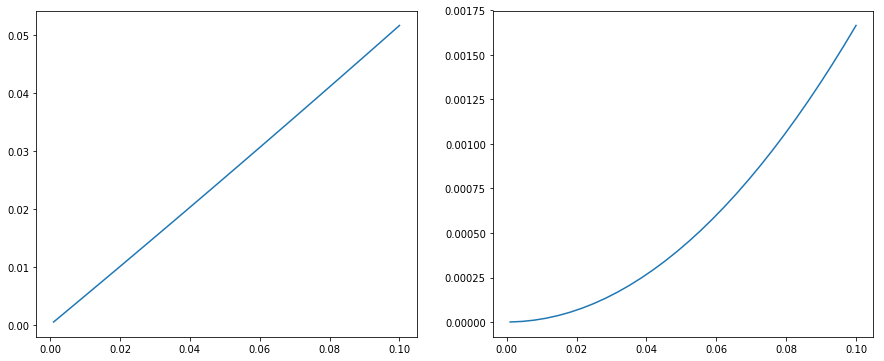

In [117]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1.plot(h_lst, err1)
ax2.plot(h_lst, err2)

The second plot looks like it may scale quadratically. Try changing:

```
ax2.plot(h_lst, err2)
```

to 

```
ax2.plot(h_lst**2, err2)
```

Since that is now linear, this algorithm scales quadratically. We can then say that:

deriv1 is order 1 or $O(1)$ and deriv2 is order 2 or $O(2)$.

When using algorithms, we will frequently talk about the order of the algorithm's error scaling. This is a very important concept in scientific computing.

## Integrals

We will look at two methods you have probably seen in calculus, the rectangle rule and the trapezoid rule. 

In [165]:
def func(x):
    return x**2

In [179]:
def rectangle(F, a, b, N):
    '''
    Given a function to integrate F, the region on which to integrate [a,b]
    and the number of divisions on the interval, N, find the value of the integral.
    '''
    # Find the size of the intervals
    size = abs(b - a) / N
    
    # Store the total sum
    tot = 0.
    
    for i in range(N):
        tot += F(a + size*i) * size
        
    return tot

In [184]:
rectangle(func, 1, 2, 100)

2.31835

Now let's try the trapezoid rule

In [181]:
def trapezoid(F, a, b, N):
    # Find the size of the intervals
    size = abs(b - a) / N
    
    tot = 0.
    
    for i in range(N):
        f1 = F(a + size * i)
        f2 = F(a + size * (i + 1))
        
        tot += size * ((f1 + f2) / 2)
        
    return tot

In [183]:
trapezoid(func, 1, 2, 100)

2.3333500000000003

The error analysis will be left to one of your exercises. 

## In 2D

Calculating integrals in 2D space is much harder. There are some ways we can do this, but the easiest is to use a Monte Carlo method and sample the area by generating random points. We will use the module `random` for this. 

In [12]:
def area_unit_circle(N):
    '''
    Sample the area of a circle of radius 1 using N points.
    '''
    points_in = 0
    
    # Find area of 1 quadrant (positive x and y)
    for i in range(N):
        # A random number from (0, 1)
        x = random.random()
        y = random.random()
                
        dist = np.sqrt(x**2 + y**2)
        
        if dist <= 1.:
            points_in += 1
     
    # Since we have only 1 quadrant, multiply by 4
    return 4 * points_in / N
    

In [14]:
area_unit_circle(10000)

3.1372